In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimg 
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
uniform_files=os.listdir("C:/projects/deeplearning_projects/uniform_classifier/data/uniform")
non_uniform_files=os.listdir("c:/projects/deeplearning_projects/uniform_classifier/data/non_uniform")

In [3]:
print(uniform_files[90])

66fe7ac8c6112441dfc0eeb9.jpg


In [4]:
print(non_uniform_files[0])

22101a010566.jpg


In [5]:
print(len(uniform_files))
print(len(non_uniform_files))

127
175


In [6]:
uniform_labels=[1]*len(uniform_files)
non_uniform_labels=[0]*len(non_uniform_files)
labels=uniform_labels+non_uniform_labels

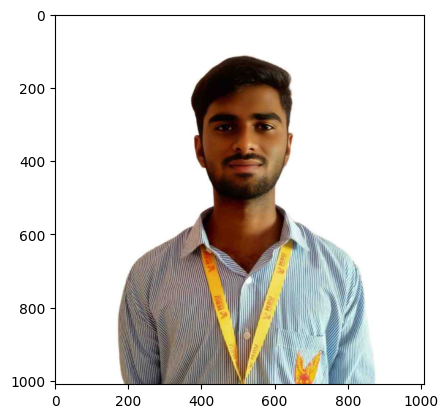

In [7]:
a=mpimg.imread('C:/projects/deeplearning_projects/uniform_classifier/data/uniform/22101A010567.jpg')
plt.imshow(a)
plt.show()

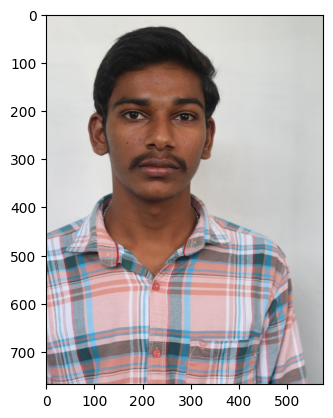

In [8]:
a=mpimg.imread("C:/projects/deeplearning_projects/uniform_classifier/data/non_uniform/22101a010566.jpg")
plt.imshow(a)
plt.show()

In [9]:
data=[]
for i in uniform_files:
    img=Image.open("C:/projects/deeplearning_projects/uniform_classifier/data/uniform/"+i)
    image=img.resize((128,128))
    #image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [10]:
for i in non_uniform_files:
    img=Image.open("C:/projects/deeplearning_projects/uniform_classifier/data/non_uniform/"+i)
    image=img.resize((128,128))
    #image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [11]:
len(data)

302

In [12]:
data=np.array(data)
label=np.array(labels)

In [13]:
data.shape

(302, 128, 128, 3)

In [14]:
label.shape

(302,)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.10,random_state=0,stratify=label)

In [16]:
x_train=x_train/225
x_test=x_test/225

In [17]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Random rotation between 0-20 degrees
    width_shift_range=0.2,   # Horizontal shift by 20% of the width
    height_shift_range=0.2,  # Vertical shift by 20% of the height
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom by 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Filling strategy for new pixels
)

In [18]:
# Fit the generator to the training data (only if x_train is a NumPy array)
datagen.fit(x_train)

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout , Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=15,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

c:\projects\deeplearning_projects\uniform_classifier\cnn_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4526 - loss: 0.8902 - val_accuracy: 0.5806 - val_loss: 0.6474
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6306 - loss: 0.6398 - val_accuracy: 0.7097 - val_loss: 0.6244
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 998ms/step - accuracy: 0.6873 - loss: 0.6024 - val_accuracy: 0.8065 - val_loss: 0.5584
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 982ms/step - accuracy: 0.7780 - loss: 0.5060 - val_accuracy: 0.7742 - val_loss: 0.5285
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8424 - loss: 0.4691 - val_accuracy: 0.8387 - val_loss: 0.4979
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 985ms/step - accuracy: 0.8618 - loss: 0.4295 - val_accuracy: 0.9032 - val_loss: 0.4588
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 986ms/step - accuracy: 0.8667 - loss: 0.3857 - val_accuracy: 0.7742 - val_loss: 0.4461
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 993ms/step - accuracy: 0.8701 - loss: 0.3771 - val_accuracy: 0.9032 - val_loss: 0.3998


In [24]:
import cv2
img_path="C:/projects/deeplearning_projects/uniform_classifier/data/non_uniform/WhatsApp Image 2024-12-19 at 19.11.50_bf287457.jpg"
img=cv2.imread(img_path)
#plt.imshow(img)
img=cv2.resize(img,(128,128))
img=img/225
img=np.reshape(img,[1,128,128,3])
img_pred=model.predict(img)
print("wearing uniform" if np.argmax(img_pred)==1 else "not wearing uniform")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
not wearing uniform


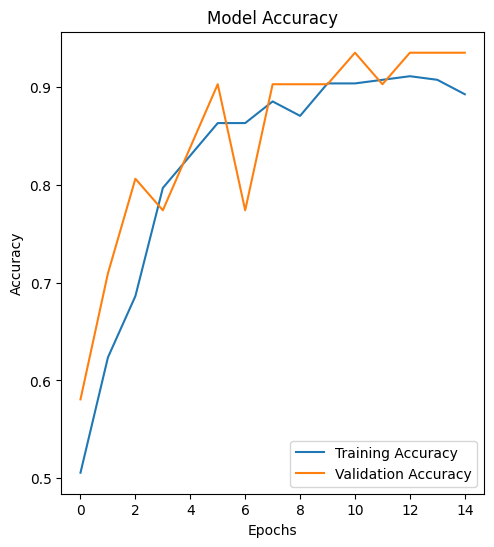

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Create 1 row, 2 columns, this is the first subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [26]:
# Save the entire model
model.save("cnn_model.h5")